In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline

matplotlib.rcParams["figure.figsize"] == (12,8)


#reading the data
df = pd.read_csv("movies.csv")



In [7]:
#Let's check the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(col, pct_missing)

name 0.0
rating 0.010041731872717789
genre 0.0
year 0.0
released 0.0002608242044861763
score 0.0003912363067292645
votes 0.0003912363067292645
director 0.0
writer 0.0003912363067292645
star 0.00013041210224308815
country 0.0003912363067292645
budget 0.2831246739697444
gross 0.02464788732394366
company 0.002217005738132499
runtime 0.0005216484089723526


In [31]:
print('sum of the null values of rating column',df['rating'].isnull().sum())
print('sum of the null values of released column',df['released'].isnull().sum())
print('sum of the null values of score column',df['score'].isnull().sum())
print('sum of the null values of votes column',df['votes'].isnull().sum())
print('sum of the null values of writer column',df['writer'].isnull().sum())
print('sum of the null values of star column',df['star'].isnull().sum())
print('sum of the null values of country column',df['country'].isnull().sum())
print('sum of the null values of budget column',df['budget'].isnull().sum())
print('sum of the null values of gross column',df['gross'].isnull().sum())
print('sum of the null values of company column',df['company'].isnull().sum())
print('sum of the null values of runtime column',df['runtime'].isnull().sum())

sum of the null values of rating column 77
sum of the null values of released column 2
sum of the null values of score column 3
sum of the null values of votes column 3
sum of the null values of writer column 3
sum of the null values of star column 1
sum of the null values of country column 3
sum of the null values of budget column 2171
sum of the null values of gross column 189
sum of the null values of company column 17
sum of the null values of runtime column 4


In [35]:
# we are droping the column because it's %1.1 null of the rating column 
df = df.dropna(subset='rating')
# same with the rating and it has just 2 null 
df = df.dropna(subset='released')
#same
df = df.dropna(subset='score')
#same
df = df.dropna(subset='votes')
#same
df = df.dropna(subset='writer')
#same
df = df.dropna(subset='star')
#same
df = df.dropna(subset='country')
#we are filling nan columns because there are %31 null of the budget column(also we could exclude from analysis too but i didnt choose this option)
df['budget'] = df['budget'].fillna(df['budget'].median())
#we are filling nan columns because it's %2.7 null of the gross column
df['gross'] = df['gross'].fillna(df['gross'].median())
#dropping nan values
df = df.dropna(subset='company')
#dropping nan values
df = df.dropna(subset='runtime')

In [37]:
#Now we are checking the null values again
print('sum of the null values of rating column',df['rating'].isnull().sum())
print('sum of the null values of released column',df['released'].isnull().sum())
print('sum of the null values of score column',df['score'].isnull().sum())
print('sum of the null values of votes column',df['votes'].isnull().sum())
print('sum of the null values of writer column',df['writer'].isnull().sum())
print('sum of the null values of star column',df['star'].isnull().sum())
print('sum of the null values of country column',df['country'].isnull().sum())
print('sum of the null values of budget column',df['budget'].isnull().sum())
print('sum of the null values of gross column',df['gross'].isnull().sum())
print('sum of the null values of company column',df['company'].isnull().sum())
print('sum of the null values of runtime column',df['runtime'].isnull().sum())

sum of the null values of rating column 0
sum of the null values of released column 0
sum of the null values of score column 0
sum of the null values of votes column 0
sum of the null values of writer column 0
sum of the null values of star column 0
sum of the null values of country column 0
sum of the null values of budget column 0
sum of the null values of gross column 0
sum of the null values of company column 0
sum of the null values of runtime column 0


In [38]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [39]:
# we don't need float data type we are converting the data type that we really need
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')



In [41]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
df = df.set_option('display.max_rows', None)

In [42]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,21000000,1672,Polygram Filmed Entertainment,87.0
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,21000000,1605,Balboa Entertainment,110.0
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,21000000,1400,British Broadcasting Corporation (BBC),103.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,21000000,682,Roxwell Films,93.0


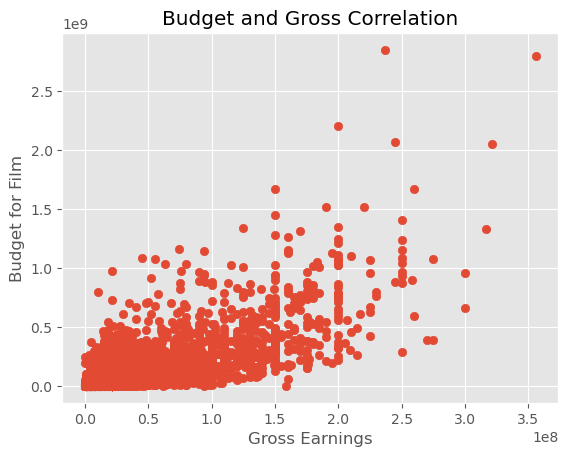

In [43]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget and Gross Correlation')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

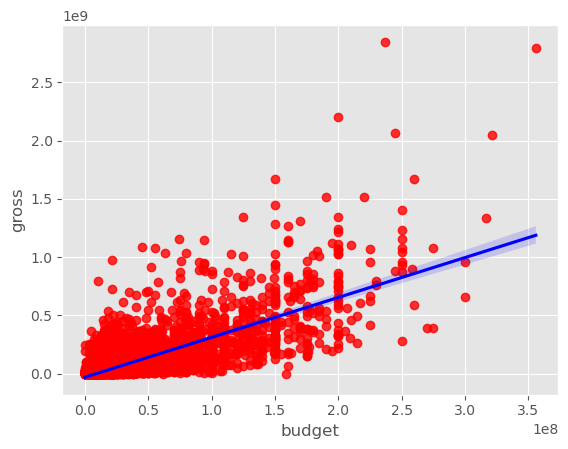

In [45]:
#Plot the bugdet and gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color' : 'blue'})

### Lets start looking at the correlation

In [49]:
numeric_df = df.select_dtypes(include='number')

numeric_df.corr(method='pearson') #also you can use kendall or spearman too as a method

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.295419,0.262132,0.120676
score,0.102346,1.000000,0.411931,0.062640,0.187518,0.400574
votes,0.226895,0.411931,1.000000,0.459061,0.632327,0.309366
budget,0.295419,0.062640,0.459061,1.000000,0.745728,0.273801
gross,0.262132,0.187518,0.632327,0.745728,1.000000,0.244196
runtime,0.120676,0.400574,0.309366,0.273801,0.244196,1.000000


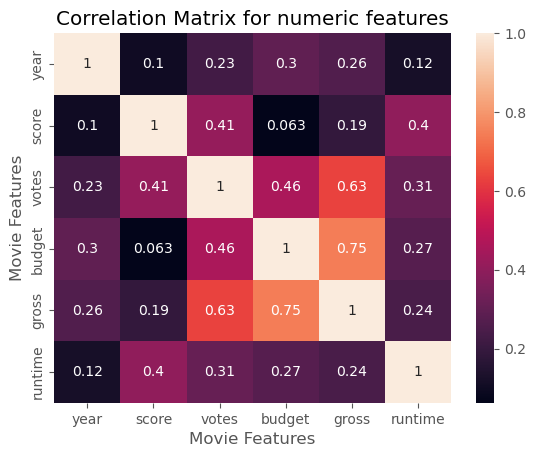

In [51]:
correlation_matrix = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [56]:
df_numerized = df
df_numerized['name'] = df_numerized['name'].astype('object')

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [57]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,527,5,0,2009,688,7.8,1100000.0,1137,1756,2283,55,237000000,2847246203,2208,162.0
7445,529,5,0,2019,180,8.4,903000.0,160,729,2192,55,356000000,2797501328,1571,181.0
3045,6811,5,6,1997,696,7.8,1100000.0,1137,1756,1560,55,200000000,2201647264,2208,194.0
6663,5075,5,0,2015,690,7.8,876000.0,1107,2518,508,55,245000000,2069521700,1505,138.0
7244,530,5,0,2018,189,8.4,897000.0,160,729,2192,55,321000000,2048359754,1571,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2656,6,5,1998,2995,6.1,2900.0,1918,1259,2112,54,21000000,1672,1829,87.0
2906,4338,3,5,1996,518,7.4,37000.0,2013,1933,1473,11,21000000,1605,327,110.0
3818,3319,6,4,2000,1103,6.5,5200.0,717,1104,2268,54,21000000,1400,463,103.0
7580,4600,3,5,2019,1814,5.2,735.0,1423,2176,2228,55,21000000,682,1948,93.0


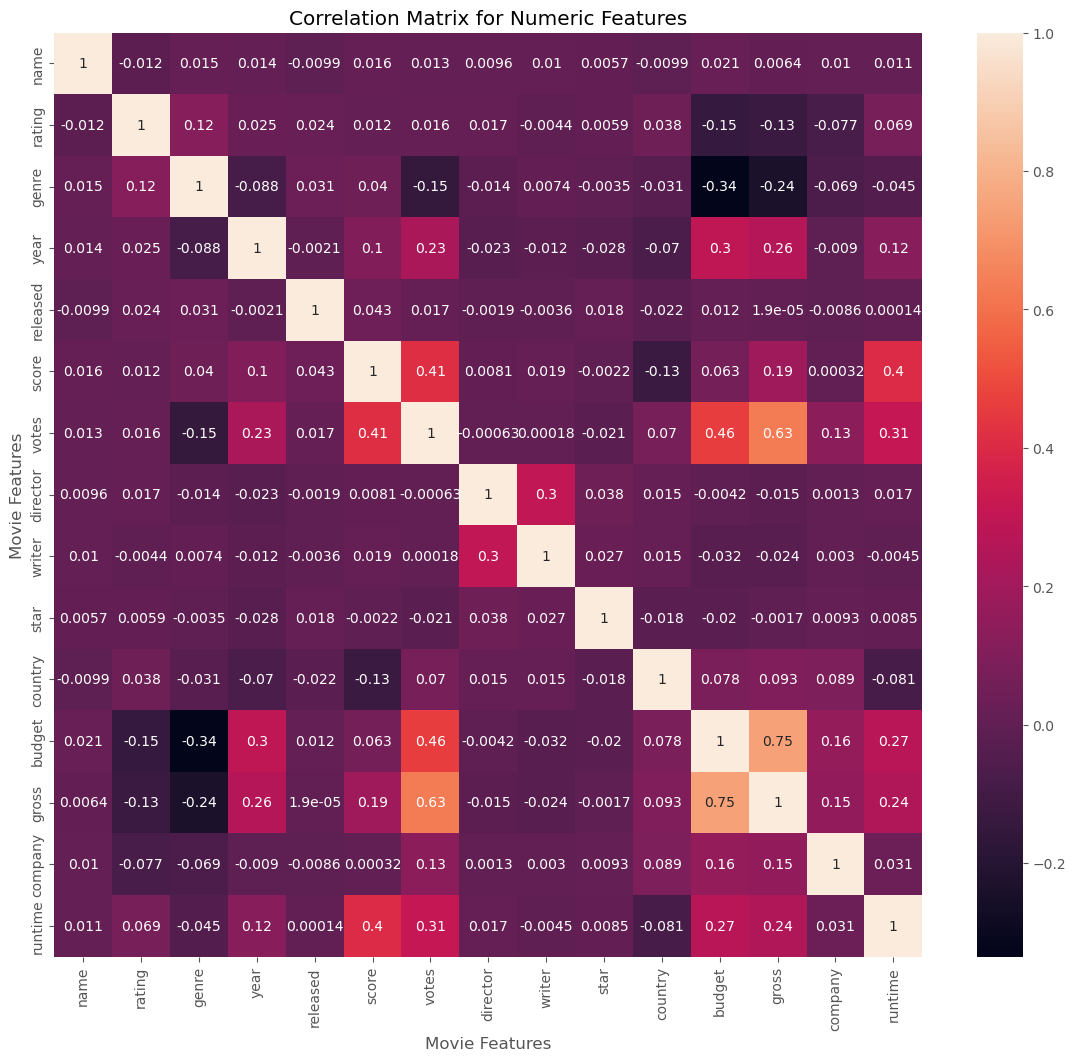

In [61]:
correlation_matrix = df_numerized.corr(method='pearson')
plt.figure(figsize=(14, 12))  # Genişliği ve yüksekliği ayarlarsın

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [63]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011924,0.015300,0.013514,-0.009906,0.016181,0.013180,0.009608,0.010217,0.005685,-0.009939,0.021354,0.006369,0.010073,0.011151
rating,-0.011924,1.000000,0.117566,0.024989,0.024319,0.011538,0.016086,0.017205,-0.004387,0.005905,0.037738,-0.146768,-0.129094,-0.076807,0.069089
genre,0.015300,0.117566,1.000000,-0.088172,0.030625,0.040090,-0.148420,-0.013508,0.007351,-0.003525,-0.031485,-0.335072,-0.240346,-0.068678,-0.044631
year,0.013514,0.024989,-0.088172,1.000000,-0.002088,0.102346,0.226895,-0.022765,-0.012318,-0.027691,-0.070266,0.295419,0.262132,-0.009026,0.120676
released,-0.009906,0.024319,0.030625,-0.002088,1.000000,0.043175,0.016877,-0.001868,-0.003569,0.018026,-0.022109,0.012155,0.000019,-0.008570,0.000145
score,0.016181,0.011538,0.040090,0.102346,0.043175,1.000000,0.411931,0.008071,0.019084,-0.002193,-0.130094,0.062640,0.187518,0.000316,0.400574
votes,0.013180,0.016086,-0.148420,0.226895,0.016877,0.411931,1.000000,-0.000627,0.000177,-0.020977,0.069582,0.459061,0.632327,0.129596,0.309366
director,0.009608,0.017205,-0.013508,-0.022765,-0.001868,0.008071,-0.000627,1.000000,0.297479,0.037570,0.015245,-0.004187,-0.014795,0.001337,0.017386
writer,0.010217,-0.004387,0.007351,-0.012318,-0.003569,0.019084,0.000177,0.297479,1.000000,0.026584,0.014937,-0.031508,-0.023811,0.003035,-0.004526
star,0.005685,0.005905,-0.003525,-0.027691,0.018026,-0.002193,-0.020977,0.037570,0.026584,1.000000,-0.017626,-0.019658,-0.001740,0.009317,0.008474


In [65]:
# Unstacking
pd.set_option('display.max_rows', None)  # show all lines
correlation_mat = df_numerized.corr(method='pearson')
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.011924
          genre       0.015300
          year        0.013514
          released   -0.009906
          score       0.016181
          votes       0.013180
          director    0.009608
          writer      0.010217
          star        0.005685
          country    -0.009939
          budget      0.021354
          gross       0.006369
          company     0.010073
          runtime     0.011151
rating    name       -0.011924
          rating      1.000000
          genre       0.117566
          year        0.024989
          released    0.024319
          score       0.011538
          votes       0.016086
          director    0.017205
          writer     -0.004387
          star        0.005905
          country     0.037738
          budget     -0.146768
          gross      -0.129094
          company    -0.076807
          runtime     0.069089
genre     name        0.015300
          rating      0.117566
        

In [71]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.335072
genre     budget     -0.335072
gross     genre      -0.240346
genre     gross      -0.240346
          votes      -0.148420
votes     genre      -0.148420
rating    budget     -0.146768
budget    rating     -0.146768
score     country    -0.130094
country   score      -0.130094
gross     rating     -0.129094
rating    gross      -0.129094
year      genre      -0.088172
genre     year       -0.088172
runtime   country    -0.081464
country   runtime    -0.081464
company   rating     -0.076807
rating    company    -0.076807
country   year       -0.070266
year      country    -0.070266
genre     company    -0.068678
company   genre      -0.068678
genre     runtime    -0.044631
runtime   genre      -0.044631
budget    writer     -0.031508
writer    budget     -0.031508
country   genre      -0.031485
genre     country    -0.031485
star      year       -0.027691
year      star       -0.027691
gross     writer     -0.023811
writer    gross      -0.023811
year    

In [72]:
high_cors = sorted_pairs[(sorted_pairs) > 0.5]
high_cors

gross     votes       0.632327
votes     gross       0.632327
gross     budget      0.745728
budget    gross       0.745728
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and Budgets have the highest correlation to gross earnings